In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import signal
from scipy.stats import norm
from scipy.stats import rayleigh

# Problem 1

#### A)

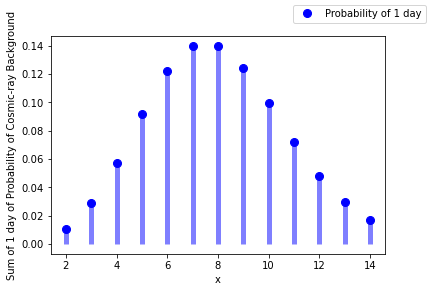

In [2]:
X = 8 # average cosmic-ray background
Y = 10 # average number of gamma-rays emitted
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X))
pois1 = poisson.pmf(x, X)
ax.plot(x, pois1, 'bo', ms=8, label='Probability of 1 day')
ax.vlines(x, 0, pois1, colors='b', lw=5, alpha=0.5)
plt.xlabel('x')
plt.ylabel('Sum of 1 day of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

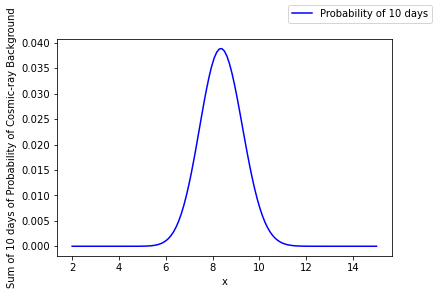

In [3]:
pois10 = poisson.pmf(x, X)
for i in range(9):
    pois10 = signal.convolve(pois1, pois10)
fig, ax = plt.subplots(1, 1)
x10 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 121)
ax.plot(x10, pois10, 'b-', ms=8, label='Probability of 10 days')
plt.xlabel('x')
plt.ylabel('Sum of 10 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

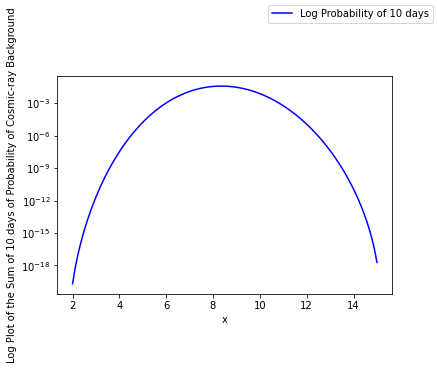

In [4]:
fig, ax = plt.subplots(1, 1)
x10 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 121)
ax.plot(x10, pois10, 'b-', ms=8, label='Log Probability of 10 days')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Log Plot of the Sum of 10 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

From the above we can see that as time passes, the sum of poisson distribution lookes more and more like a gaussian which we can see from the sum's log. The log looks like a upside-down parabola.

#### B)

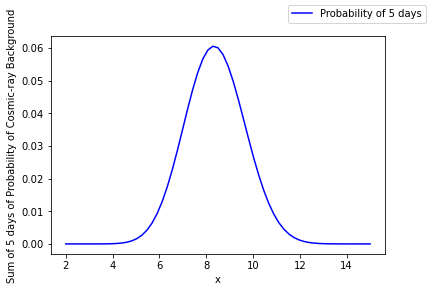

In [5]:
pois5 = poisson.pmf(x, X)
for i in range(4):
    pois5 = signal.convolve(pois1, pois5)
fig, ax = plt.subplots(1, 1)
x5 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 61)
ax.plot(x5, pois5, 'b-', ms=8, label='Probability of 5 days')
plt.xlabel('x')
plt.ylabel('Sum of 5 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

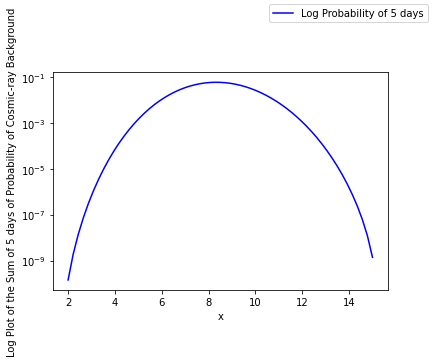

In [6]:
pois5 = poisson.pmf(x, X)
for i in range(4):
    pois5 = signal.convolve(pois1, pois5)
fig, ax = plt.subplots(1, 1)
x5 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 61)
ax.plot(x5, pois5, 'b-', ms=8, label='Log Probability of 5 days')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Log Plot of the Sum of 5 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

From the log plot, we can see that although the log plot of the 5-day sum of the poisson is almost a upside-down parabola, it leans toward one side clearly. Hence, the current distribution is still a poisson. This situation is due to the central limit theorem. With enough convolutions, any distributions can sum up to a Gaussian. This is because as you convolve  the sum or average of the distribution, the high probable events will sum up to a higher standard, with the low probable events will have their significance reduces. The result is the mean of the distribution shift toward the peak which make any distribution a Gaussian after convolve.

#### C)

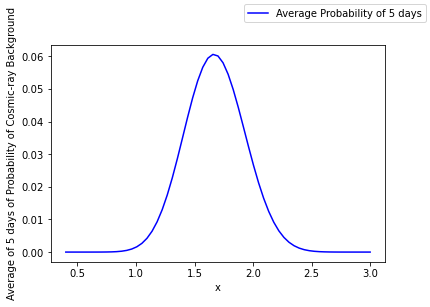

In [7]:
avg5 = pois5
fig, ax = plt.subplots(1, 1)
x5 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 61)
ax.plot(x5/5, avg5, 'b-', ms=8, label='Average Probability of 5 days')
plt.xlabel('x')
plt.ylabel('Average of 5 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

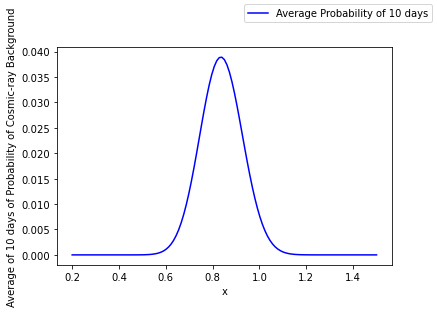

In [8]:
avg10 = pois10
fig, ax = plt.subplots(1, 1)
x10 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 121)
ax.plot(x10/10, avg10, 'b-', ms=8, label='Average Probability of 10 days')
plt.xlabel('x')
plt.ylabel('Average of 10 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

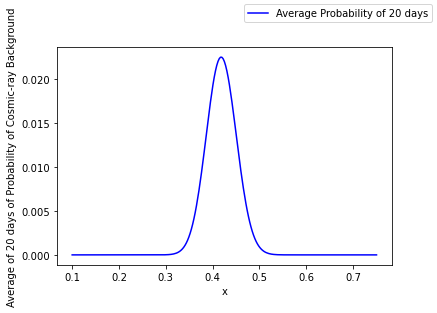

In [9]:
pois20 = poisson.pmf(x, X)
for i in range(19):
    pois20 = signal.convolve(pois1, pois20)
fig, ax = plt.subplots(1, 1)
x20 = np.linspace(poisson.ppf(0.01, X),
              poisson.ppf(0.99, X), 241)
ax.plot(x20/20, pois20, 'b-', ms=8, label='Average Probability of 20 days')
plt.xlabel('x')
plt.ylabel('Average of 20 days of Probability of Cosmic-ray Background')
fig.legend()
plt.show()

The above graphs shows that as the day goes, the sum of poisson distributions become more and more like a gaussian and the average just makes the x-axis rearranged.

#### D)

In [10]:
N = 10
rays = Y * N
pois = poisson.pmf(x, X)
pois_rays = poisson.pmf(x, X)
for i in range(N-1):
    pois_rays = signal.convolve(pois_rays, pois)
result = np.cumsum(pois_rays)
prob = result[-1]
sigma = norm.ppf(1 - prob)
sigma

-0.895624384436472

The result of sigma is negative because the target is on the left of the average. With sigma less than 5 sigma, the target is unlikely to be observed significantly.

# Problem 2
#### A)

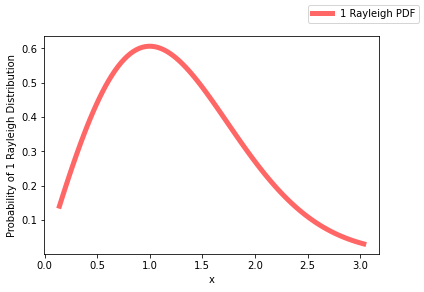

In [11]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 100)
ray1 = rayleigh.pdf(x)
ax.plot(x, ray1, 'r-', lw=5, alpha=0.6, label='1 Rayleigh PDF')
plt.xlabel('x')
plt.ylabel('Probability of 1 Rayleigh Distribution')
fig.legend()
plt.show()

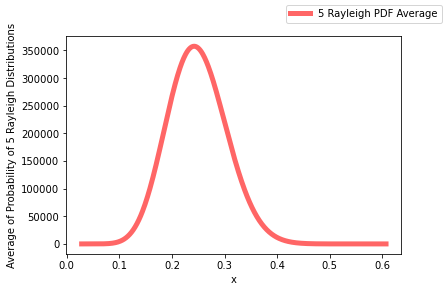

In [12]:
ray5 = rayleigh.pdf(x)
for i in range(4):
    ray5 = signal.convolve(ray1, ray5)
fig, ax = plt.subplots(1, 1)
x5 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 496)
ax.plot(x5/5, ray5, 'r-', lw=5, alpha=0.6, label='5 Rayleigh PDF Average')
plt.xlabel('x')
plt.ylabel('Average of Probability of 5 Rayleigh Distributions')
fig.legend()
plt.show()

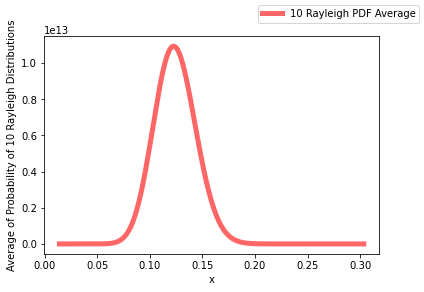

In [13]:
ray10 = rayleigh.pdf(x)
for i in range(9):
    ray10 = signal.convolve(ray1, ray10)
fig, ax = plt.subplots(1, 1)
x10 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 991)
ax.plot(x10/10, ray10, 'r-', lw=5, alpha=0.6, label='10 Rayleigh PDF Average')
plt.xlabel('x')
plt.ylabel('Average of Probability of 10 Rayleigh Distributions')
fig.legend()
plt.show()

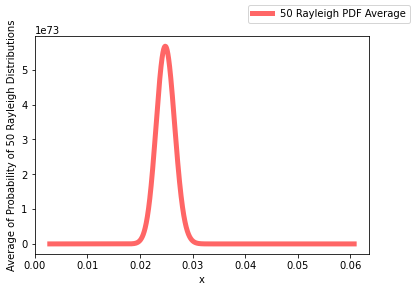

In [14]:
ray50 = rayleigh.pdf(x)
for i in range(49):
    ray50 = signal.convolve(ray1, ray50)
fig, ax = plt.subplots(1, 1)
x50 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 4951)
ax.plot(x50/50, ray50, 'r-', lw=5, alpha=0.6, label='50 Rayleigh PDF Average')
plt.xlabel('x')
plt.ylabel('Average of Probability of 50 Rayleigh Distributions')
fig.legend()
plt.show()

The distribution becomes more and more like a gaussian distribution which the average of sum make the x-axis remains the same.

#### B)

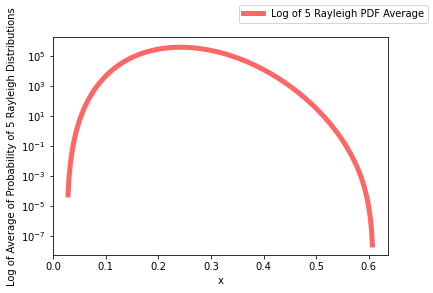

In [15]:
ray5 = rayleigh.pdf(x)
for i in range(4):
    ray5 = signal.convolve(ray1, ray5)
fig, ax = plt.subplots(1, 1)
x5 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 496)
ax.plot(x5/5, ray5, 'r-', lw=5, alpha=0.6, label='Log of 5 Rayleigh PDF Average')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Log of Average of Probability of 5 Rayleigh Distributions')
fig.legend()
plt.show()

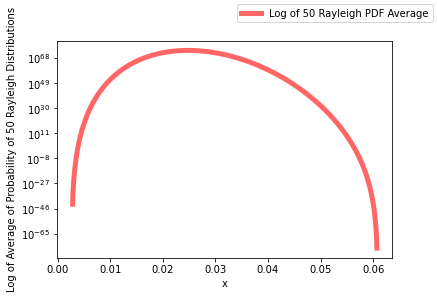

In [16]:
ray50 = rayleigh.pdf(x)
for i in range(49):
    ray50 = signal.convolve(ray1, ray50)
fig, ax = plt.subplots(1, 1)
x50 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), 4951)
ax.plot(x50/50, ray50, 'r-', lw=5, alpha=0.6, label='Log of 50 Rayleigh PDF Average')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Log of Average of Probability of 50 Rayleigh Distributions')
fig.legend()
plt.show()

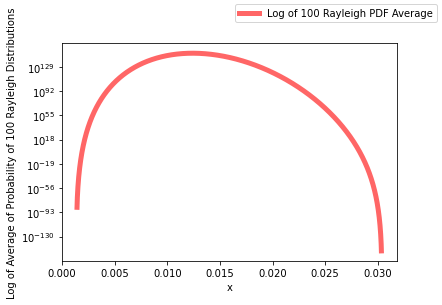

In [17]:
ray100 = rayleigh.pdf(x)
for i in range(99):
    ray100 = signal.convolve(ray1, ray100)
fig, ax = plt.subplots(1, 1)
x100 = np.linspace(rayleigh.ppf(0.01),
                rayleigh.ppf(0.99), len(ray100))
ax.plot(x100/100, ray100, 'r-', lw=5, alpha=0.6, label='Log of 100 Rayleigh PDF Average')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Log of Average of Probability of 100 Rayleigh Distributions')
fig.legend()
plt.show()

100 convolve is the best I can do with python. It still does not look like a gaussian as much as other distributions behave. However, it is getting closer and closer to a upside-down parabola. If it is possible to do at least 500 times convolutions, the sum may eventually gets to a gaussian.

# Problem 3
#### A)

In [18]:
X = 1
dist = norm(0, X)
# For convinence, we pick distribution to be mu, var = 0, 1
Y = 4.5
sigma = (Y - 0)/1
sigma

4.5

The sigma shows that I can't claim a discovery which is less than 5-sigma threshold.

#### B)

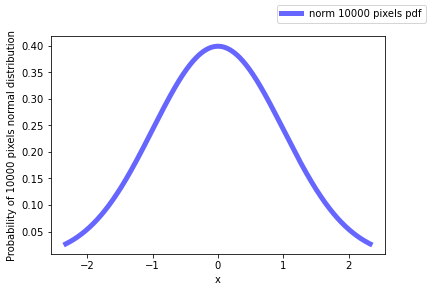

In [19]:
pixels = 10000
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 10000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist.pdf(x), 'b-', lw=5, alpha=0.6, label='norm 10000 pixels pdf')
plt.xlabel('x')
plt.ylabel('Probability of 10000 pixels normal distribution')
fig.legend()
plt.show()

#### C)
The integral from 0.6 to inf of the normal pdf will give us the probability of seeing 0.6.

In [20]:
prob = 1 - dist.cdf(Y)
sigma = norm.ppf((prob) * pixels)
sigma

-1.8253153009405998

# Problem 4
#### A)

This sigma means that our observation is not significant which is smaller than 5-sigma threshhold.

For version 1, because of our assumptions which  our Gaussian distribution has the mean of 0 and standard deviation of 1. This means to get a 5-sigma event we would need something at least 5. Thus, det = 5.

#### B)

In [21]:
sigma5 = 1/3.5e6

Because we are obeserving 10k pixels in version 2, we need to rearrange the x-axis to fit our new pdf. Therefore, we have to divide the sigma5 by the number of pixels and to find the target x for sigma5 in our new pdf.

In [22]:
det = dist.ppf(1-sigma5/pixels)
det

6.551026394051586

The 5-sigma detection of version 2 is 6.55

#### C)

In [23]:
b = (det - 5)/5
b

0.31020527881031723

This means with a trials factor of 10k, the signal must be 31% brighter than only 1 pixel. The sensitivity penalty is low because for Gaussian distribution, the edge cases originally occurred in a  relative low probabilities. With increasing trials, the sigmas will not be affected as much.

#### D)
Assuming we increases the num of pixels from 10k to 100k

In [24]:
pixels2 = 100000
det2 = dist.ppf(1-sigma5/pixels2)
det2

6.886596060925245

We can see that the increases in det is very limited, even though we have increased the trials factor by 10.

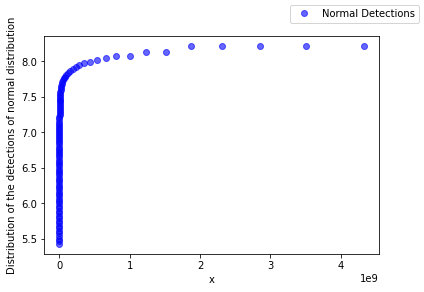

In [25]:
pixels_seq = np.logspace(1, 10, num=100, base=10)
dets = np.ones(100)
for i in range(len(pixels_seq)):
    dets[i] = dist.ppf(1-sigma5/pixels_seq[i])
fig, ax = plt.subplots(1, 1)
ax.plot(pixels_seq, dets, 'bo', lw=2, alpha=0.6, label='Normal Detections')
plt.xlabel('x')
plt.ylabel('Distribution of the detections of normal distribution')
fig.legend()
plt.show()

From the above plot, we can see that the detection of 5-sigma threshold does not increase much when the trials factor increases significantly.

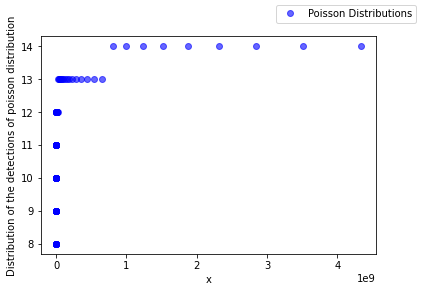

In [26]:
pois_tf = poisson(0.5)
for i in range(len(pixels_seq)):
    dets[i] = pois_tf.ppf(1-sigma5/pixels_seq[i])
fig, ax = plt.subplots(1, 1)
ax.plot(pixels_seq, dets, 'bo', lw=2, alpha=0.6, label='Poisson Distributions')
plt.xlabel('x')
plt.ylabel('Distribution of the detections of poisson distribution')
fig.legend()
plt.show()

From the above plot, we can see that the detection of 5-sigma threshold increases a lot when the trials factor increases significantly for a non-gaussian-in this case, a poisson distribution.